## MATH 360 Assignment 1

Yushin Nam | 85058832 | Discussed with: Anthony M, Nara S, Umay G, Tiffany W

In [82]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

print("Packages imported")

Packages imported


# Description

The Earth and atmosphere are two separate bodies which both absorb and emit heat. The Sun emits shortwave thermal radiation which passes through the atmosphere, a fraction is absorbed by the surface of the Earth, and the remainder is reflected back into space. The Earth emits longwave thermal radiation which is absorbed by the atmosphere. The atmosphere emits thermal radiation both upward into outer space and also downward which is reabsorbed by the Earth. 

# Problem Statment

What is the energy balance of the Earth surface and the atmosphere?

# Variables and Parameters

| Description | Symbol | Type |
| :---: | :---: | :---: |
| temperature of Earth surface | $T_E$ | dependent variable |
| temperature of the atmosphere | $T_a$ | dependent variable |
| time | $t$ | independent variable |
| heat capacity | $C$ | parameter |
| the thermal radiation from the Sun / the solar constant | $S_0$ | parameter |
| the radius of the Earth | $R$ | parameter |
| the fraction of the Sun's radiation reflected by the Earth / the albedo | $\alpha$ | parameter |
| the Stefan-Boltzmann constant | $\delta$ | parameter |
| The greenhouse effect constant | $\varepsilon$ | parameter |

# Assumptions and Constraints

* The difference between the radius of the Earth and the radius of the atmosphere is negligible
* Both the Earth and atmosphere emit thermal energy like black bodies
* The thermal radiation reabsorbed by the Earth surface is exactly half of the thermal radiation emitted by the atmosphere
* The shorwave thermal radiation emitted by the sun is not absorbed by the atmosphere

# Build Solution

We can reference the energy balance equation:

$$C\frac{dT}{dt} = Q_{in} - Q_{out}$$

For the Earth surface, we have a shortwave thermal energy emitted from Sun, absorbed by the Earth. Additionally, the half of the thermal energy emitted by the atmosphere is reabsorbed by the Earth as well. Since Earth is considered to be a black body, it emits longwaver thermal radiation. 

$$C\frac{dT_E}{dt} = (1-\alpha)\pi R^{2}S_0 - 4\pi R^2 \delta \varepsilon T_{E}^4 + \frac{4\pi R^2\delta T_{a}^4}{2}$$

For the atmosphere, portion of longwave thermal radiation emitted by the Earth is absorbed by the atmosphere by the greenhouse effect. Since atmosphere is also considered to be a black body, it emits longwave thermal radiation to both outward and inward, which Earth reabsorbs.

$$C\frac{dT_a}{dt} = 4\pi R^2\delta (1-\varepsilon)T_{E}^4 - 4\pi R^2\delta T_{a}^4$$

Altogether we have,


\begin{align*}
C\frac{dT_E}{dt} &= (1-\alpha)\pi R^{2}S_0 - 4\pi R^2 \delta \varepsilon T_{E}^4 + \frac{4\pi R^2\delta T_{a}^4}{2} \\
C\frac{dT_a}{dt} &= 4\pi R^2\delta (1-\varepsilon)T_{E}^4 - 4\pi R^2\delta T_{a}^4 \\
&T_{E}(0) = T_{E,0} , T_a(0) = T_{a,0}
\end{align*}

# Nondimensionalization

Let $T_E = [T_E]T_{E}^{*}$, $T_a = [T_a]T_{a}^{*}$, $t = [t]t^{*}$
We can have $[T_E] = [T_a] = [T]$ to simplify the process. 
Then we hvae,

\begin{align*}

\frac{C[T]}{[t]}\frac{dT_E^{*}}{dt^{*}} &= (1-\alpha)\pi R^{2}S_0 - 4\pi R^2 \delta \varepsilon [T]T_{E}^{*4} + \frac{4\pi R^2\delta [T]T_{a}^{*4}}{2} \\
\frac{C[T]}{[t]}\frac{dT_a^{*}}{dt^{*}} &= 4\pi R^2\delta (1-\varepsilon)[T]T_{E}^{*4} - 4\pi R^2\delta [T]T_{a}^{*4} \\
&[T]T_{E}^{*}(0) = T_{E,0} , [T]T_a^{*}(0) = T_{a,0}

\end{align*}

Divinding by the coefficients of the derivative,

\begin{align*}

\frac{dT_E^{*}}{dt^{*}} &= \frac{(1-\alpha)\pi R^{2}S_0[t]}{C[T]} - \frac{4\pi R^2 \delta \varepsilon [T]T_{E}^{*4}[t]}{C[T]} + \frac{4\pi R^2\delta [T]T_{a}^{*4}[t]}{2C[T]} \\
\frac{dT_a^{*}}{dt^{*}} &= \frac{4\pi R^2\delta (1-\varepsilon)[T]T_{E}^{*4}[t]}{C[T]} - \frac{4\pi R^2\delta [T]T_{a}^{*4}[t]}{C[T]} \\
&T_{E}^{*}(0) = \frac{T_{E,0}}{[T]} , T_a^{*}(0) = \frac{T_{a,0}}{[T]}

\end{align*}

From the first and the second term of the first equation, we can choose: $$[T] = \left(\frac{(1-\alpha)S_0}{4\delta} \right)^{1/4} \ [t] = \frac{C}{4\pi R^2\delta\varepsilon \left(\frac{(1-\alpha)S_0}{4\delta}\right)^{3/4}}$$

Finally we have,

\begin{align*}

\frac{dT_E^{*}}{dt^{*}} &= 1-T_E^{*4} + \frac{1}{2}\varepsilon T_a^{*4} \\
\frac{dT_a^{*}}{dt^{*}} &= T_E^{*4} - \varepsilon T_a^{*4}

\end{align*}

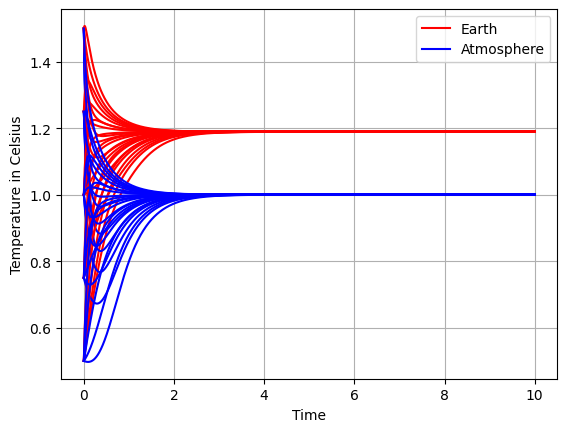

In [83]:
epsilon = 2
t = np.linspace(0, 10, 1000)


def f(u, t):
    dudt = np.zeros(2)
    dudt[0] = 1 - u[0]**4 + epsilon*(1/2)*u[1]**4
    dudt[1] = u[0]**4 - epsilon*u[1]**4
    return dudt


for t0 in [0.5, 0.75, 1.0, 1.25, 1.5]:
    for t1 in [0.5, 0.75, 1.0, 1.25, 1.5]:
        u0 = [t0, t1]
        u = spi.odeint(f, u0, t)
        plt.plot(t, u[:,0], 'r', t, u[:,1], 'b')

plt.grid(True)
plt.ylabel("Temperature in Celsius"), plt.xlabel("Time")
plt.legend(["Earth", "Atmosphere"])
plt.show()

## Analysis

In the graph, we have two equillibrium points for both Earth surface and the atmosphere. For the Earth, the scaled temperature will be stable at around 1.2 degrees Celsius, depite the different initial conditions. For the atmosphere, the temperature will be stable at 1.0 degrees Celsius as well. These two are the results from a choice of $\varepsilon = 2$ as a constant that is part of the equation. 
I think this phenomenon makes sense because the Earth is absorbing thermal radiation from both the Sun and the atmosphere, $(1-\alpha)\pi R^2 S_0$ and $\frac{4\pi R^2\delta \varepsilon T_a^4}{2}$ respectively. Therefore, the Earth has two inputs of radiation and 1 output where it emits a longwave radiation to the space. On the other hand, the atmosphere only absorbs the radiation from the Earth and emits radiation to both outer and inner space. 